Bu notebook yarı-işlemiş verinin sütunlarını ve değerlerini daha yakından incelemek için oluşturulmuştur

# Setup

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [4]:
""" EDA 1'den gelen veri """

df = pd.read_csv(r"DATASETS\After_EDA1.csv")

df.head(10)

,ChannelKey,DataAreaKey,InventKey,TransactionDateKey,InventLocationKey,CampaignKrcKey,SalesQuantity,SalesGrossAmount,Return_Quantity,NetQuantity,NetGrossAmount,ReturnGrossAmount,ReturnNetAmount,NetAmountWOVat,DiscountAmount,DiscountGrossAmount,RboStoreKey,IsChangeCardSales,HourIntervalKey,TransactionDateTime,NetAmount,NetSalesCostAmount,NetCostAmountReport,IsFirstOrder
0,2,2,162798,20240131,8454,-99,1.0,300.03,0.0,1.0,300.03,0.00,0.00,250.02,52.90,52.90,1327,Hayır,15,2024-01-31 14:50:00,-250.02,83.87,83.87,True
1,2,2,168963,20240131,8454,-99,1.0,12.00,0.0,1.0,12.00,0.00,0.00,10.00,0.00,0.71,1327,Hayır,18,2024-01-31 17:18:00,-10.00,2.06,2.06,True
2,2,2,173806,20240131,3085,-99,1.0,0.18,0.0,1.0,0.18,0.00,0.00,0.15,0.07,1.30,997,Hayır,22,2024-01-31 21:31:00,-0.15,0.57,0.57,True
3,2,2,173806,20240131,3085,-99,1.0,0.21,0.0,1.0,0.21,0.00,0.00,0.18,0.04,1.27,997,Hayır,21,2024-01-31 20:21:00,-0.18,0.57,0.57,True
4,2,2,173808,20240131,8454,-99,1.0,0.21,0.0,1.0,0.21,0.00,0.00,0.18,0.04,1.74,1327,Hayır,15,2024-01-31 14:50:00,-0.18,0.93,0.93,True
5,2,2,173810,20240131,3083,-99,0.0,0.00,1.0,-1.0,-0.21,0.21,0.18,-0.18,0.00,0.00,995,Hayır,21,2024-01-31 20:24:00,0.18,-1.85,-1.85,True
6,2,2,173810,20240131,8190,-99,0.0,0.00,1.0,-1.0,-0.21,0.21,0.18,-0.18,0.00,0.00,1325,Hayır,21,2024-01-31 20:39:00,0.18,-1.85,-1.85,True
7,2,2,173810,20240131,8190,-99,0.0,0.00,1.0,-1.0,-0.21,0.21,0.18,-0.18,0.00,0.00,1325,Hayır,21,2024-01-31 20:39:00,0.18,-1.85,-1.85,True
8,2,2,173810,20240131,9216,-99,1.0,0.21,0.0,1.0,0.21,0.00,0.00,0.18,0.04,3.78,4542,Hayır,18,2024-01-31 17:09:00,-0.18,1.85,1.85,True
9,2,2,239683,20240131,8190,-99,0.0,0.00,1.0,-1.0,-2499.04,2499.04,2082.53,-2082.53,0.00,0.00,1325,Hayır,21,2024-01-31 20:39:00,2082.53,-1184.06,-1184.06,True


In [5]:
df.columns

Index(['ChannelKey', 'DataAreaKey', 'InventKey', 'TransactionDateKey',
       'InventLocationKey', 'CampaignKrcKey', 'SalesQuantity',
       'SalesGrossAmount', 'Return_Quantity', 'NetQuantity', 'NetGrossAmount',
       'ReturnGrossAmount', 'ReturnNetAmount', 'NetAmountWOVat',
       'DiscountAmount', 'DiscountGrossAmount', 'RboStoreKey',
       'IsChangeCardSales', 'HourIntervalKey', 'TransactionDateTime',
       'NetAmount', 'NetSalesCostAmount', 'NetCostAmountReport',
       'IsFirstOrder'],
      dtype='object')

In [6]:
df.dtypes

ChannelKey               int64
DataAreaKey              int64
InventKey                int64
TransactionDateKey       int64
InventLocationKey        int64
CampaignKrcKey           int64
SalesQuantity          float64
SalesGrossAmount       float64
Return_Quantity        float64
NetQuantity            float64
NetGrossAmount         float64
ReturnGrossAmount      float64
ReturnNetAmount        float64
NetAmountWOVat         float64
DiscountAmount         float64
DiscountGrossAmount    float64
RboStoreKey              int64
IsChangeCardSales       object
HourIntervalKey          int64
TransactionDateTime     object
NetAmount              float64
NetSalesCostAmount     float64
NetCostAmountReport    float64
IsFirstOrder              bool
dtype: object

In [7]:
columns_to_change = ['ChannelKey', 'DataAreaKey', 'InventKey', 'TransactionDateKey', 'InventLocationKey', 'CampaignKrcKey','RboStoreKey']
new_dtype = 'str'

df[columns_to_change] = df[columns_to_change].astype(new_dtype)

# Numerical Distributions

In [8]:
numerical_columns = df.select_dtypes(include=['number'])

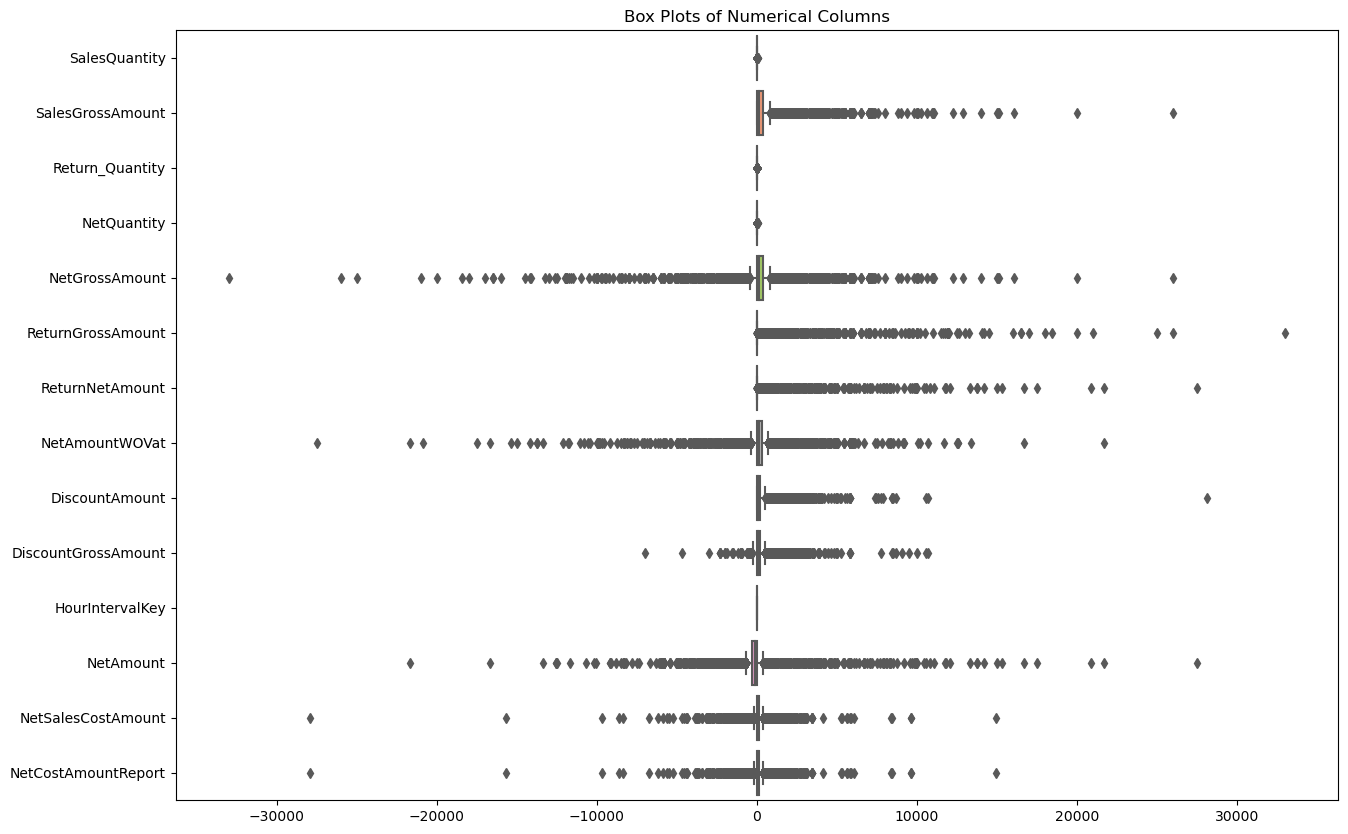

In [9]:
# Numeric sütunlar için box grafiği
plt.figure(figsize=(15, 10))
sns.boxplot(data=numerical_columns, orient="h", palette="Set2")
plt.title('Box Plots of Numerical Columns')
plt.show()

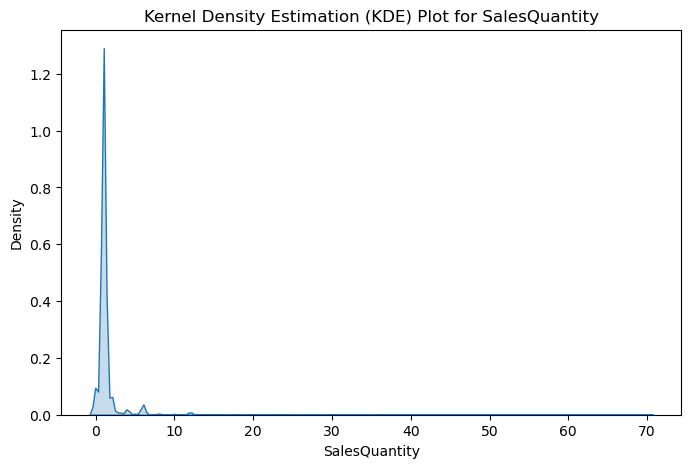

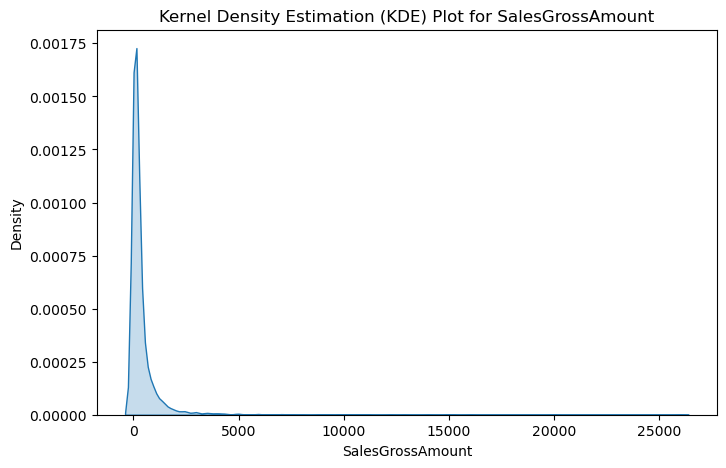

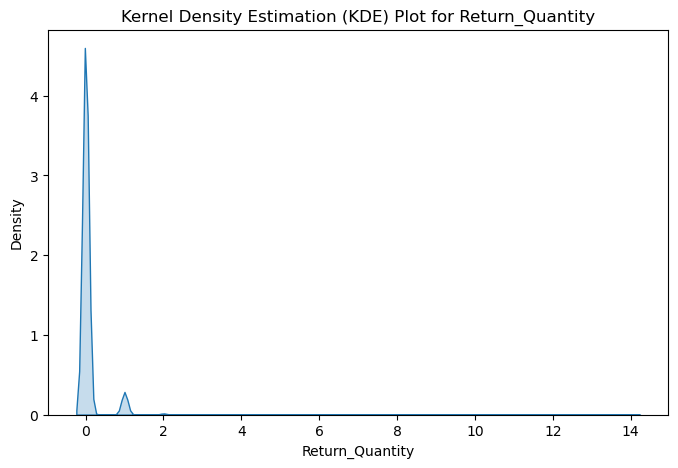

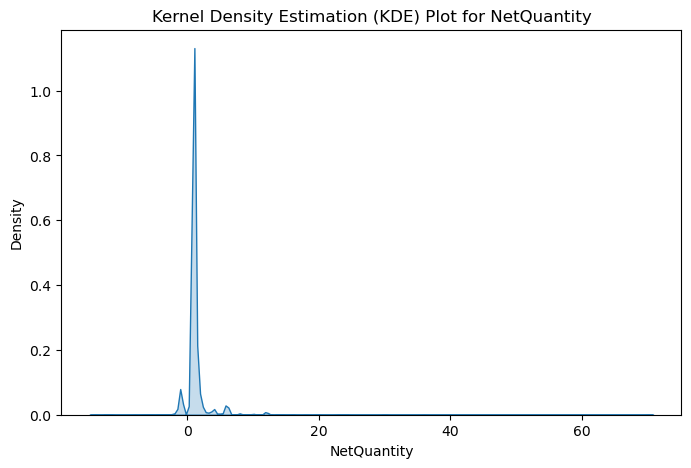

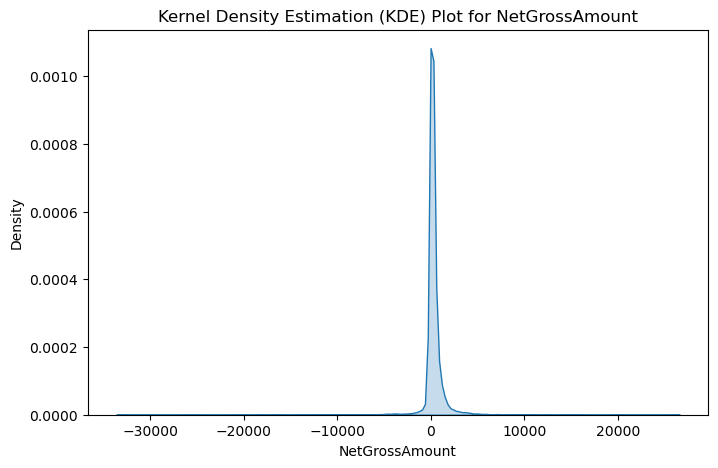

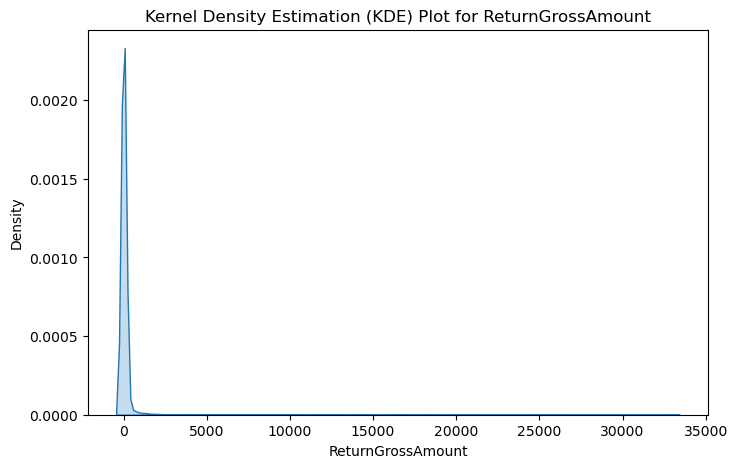

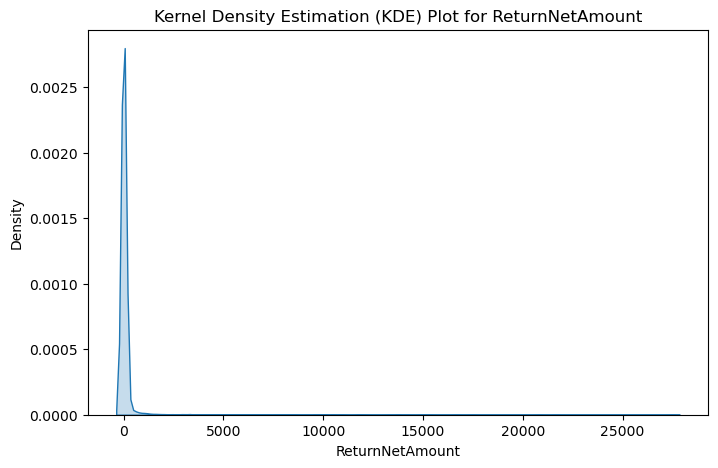

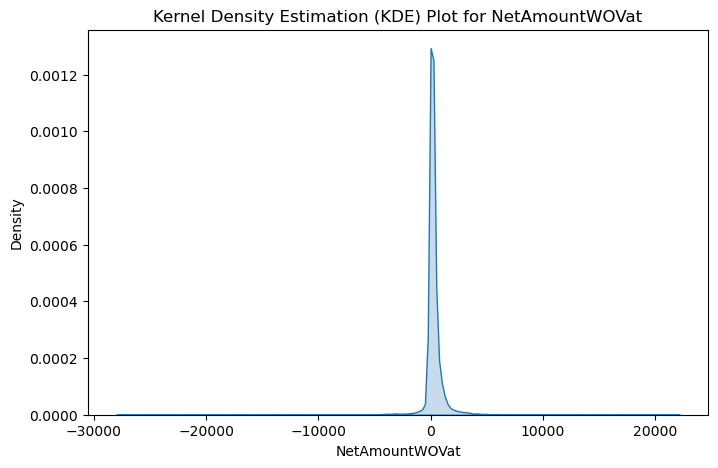

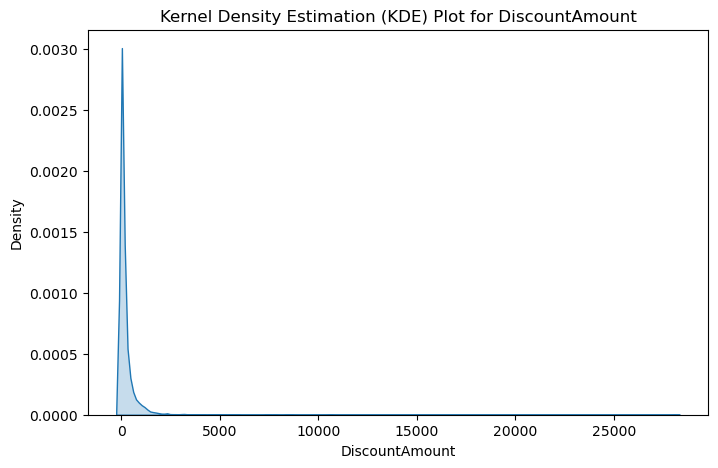

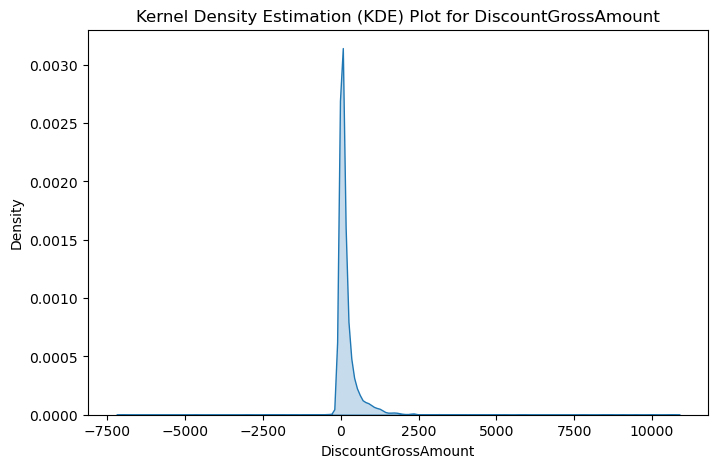

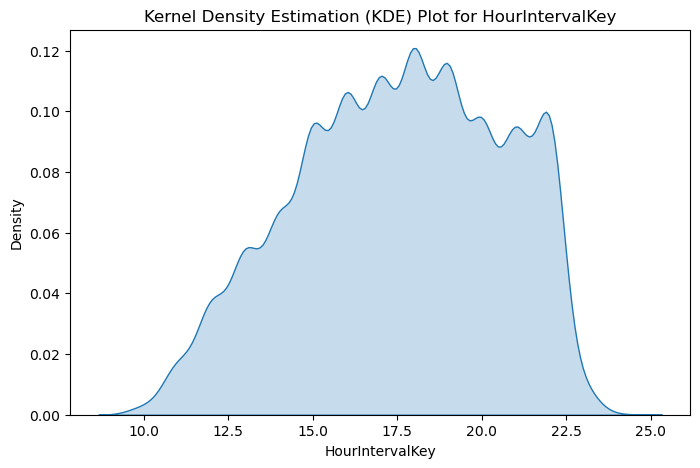

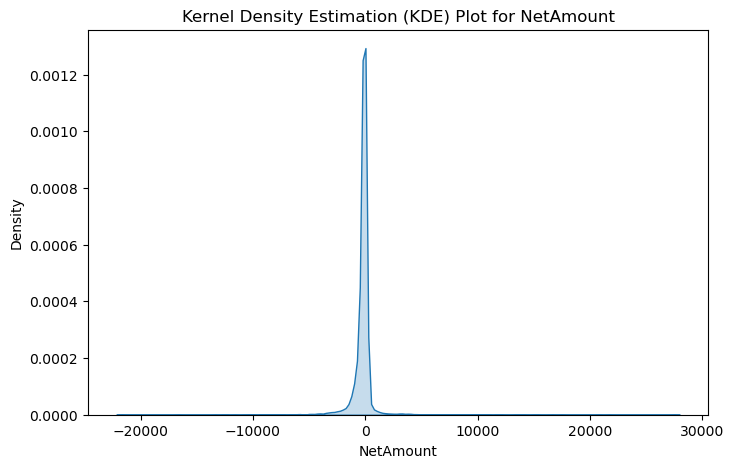

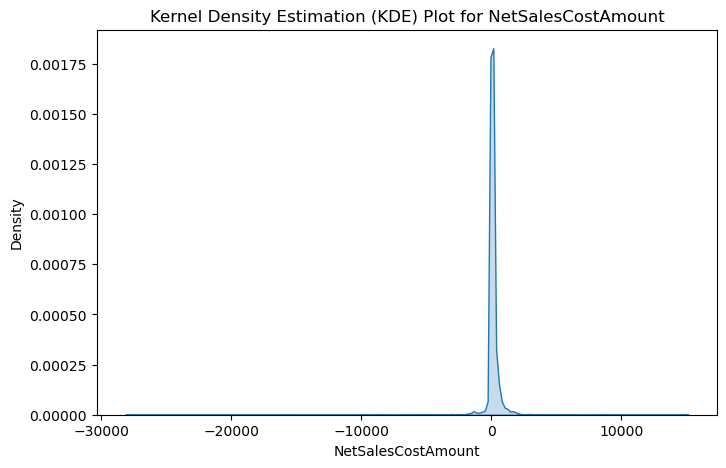

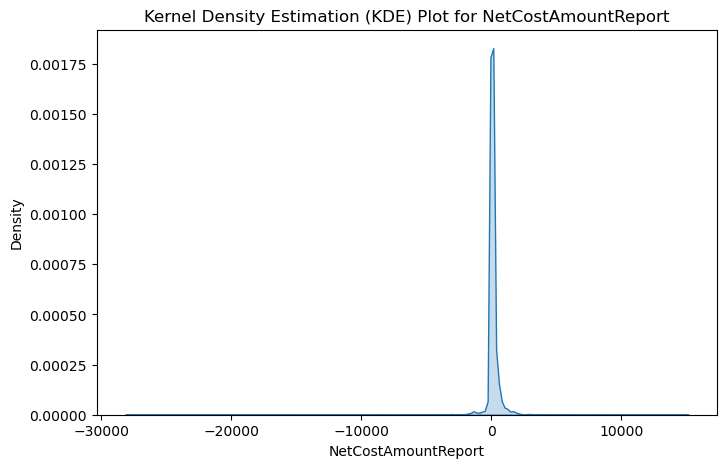

In [10]:
# Numeric sütunlar için KDE grafikleri
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Kernel Density Estimation (KDE) Plot for {column}')
    plt.show()